source/0177.pdf300.png
0177.pdf300
test/0177.pdf300/2872-476-126-38.png
test/0177.pdf300/1856-1602-122-36.png
test/0177.pdf300/979-1783-123-35.png
test/0177.pdf300/1480-1230-116-38.png
test/0177.pdf300/2839-608-113-37.png
test/0177.pdf300/198-1193-116-35.png
test/0177.pdf300/841-1420-119-34.png
test/0177.pdf300/1481-1104-119-36.png
test/0177.pdf300/887-1635-116-35.png
test/0177.pdf300/1528-1784-120-35.png
test/0177.pdf300/290-1285-128-36.png
test/0177.pdf300/795-1593-126-35.png
test/0177.pdf300/1926-1108-123-37.png
test/0177.pdf300/243-1594-117-36.png
test/0177.pdf300/1573-1105-117-35.png


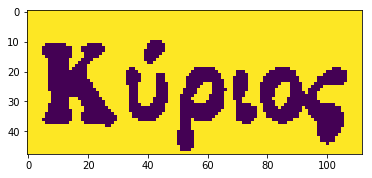

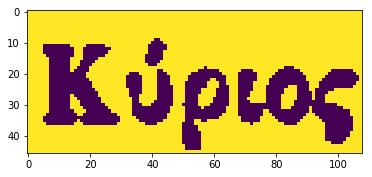

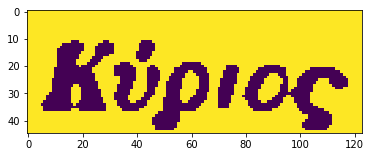

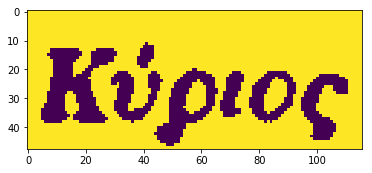

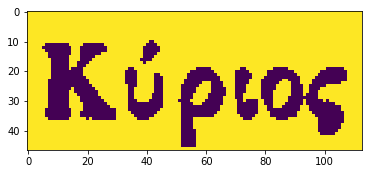

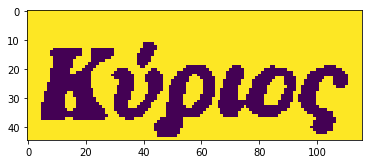

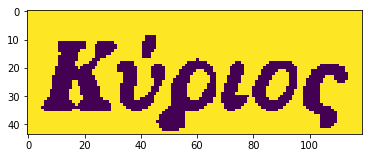

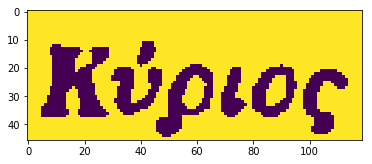

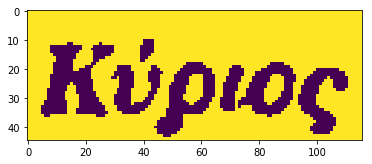

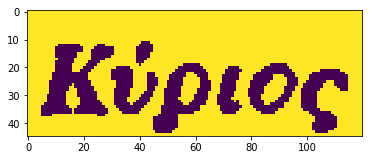

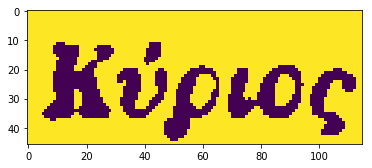

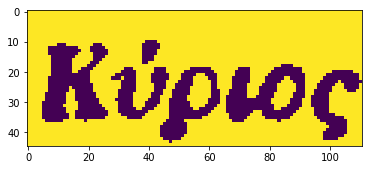

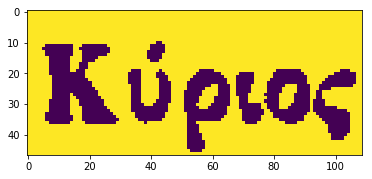

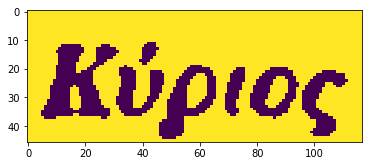

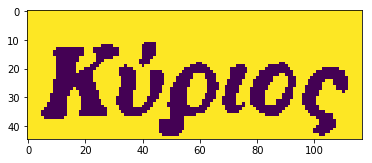

In [8]:
import cv2 as cv2  
from matplotlib import pyplot as plt
import numpy as np
import re

import shutil
import glob, os

%run PgFunctions.py 

def compareHUandSC(queryFile, dataFile):
        
        params={}
        
        query= cv2.imread("word/kyrios.png",0);
        erodeimg=applyCircleErosion(query)
        _, QueryContours, _ = cv2.findContours(erodeimg, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        
        
        data = cv2.imread(filename,0)

        if data is None:
            params["DA"]="NONE"
            return
        else:
            params["DA"]="EXIST"
            erodedata=applyCircleErosion(data)
            _, DataContours, _ = cv2.findContours(erodedata, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        
        
        
        if len(DataContours)>1:
            params["CO"]="EXIST"
           
            
            
            #cut off the very disimilar images using HU moments for speeding the algorithm
            ret = cv2.matchShapes(QueryContours[1],DataContours[1],3,0.0)
            params["HU"]=ret
            if ret<0.1:
                sd = cv2.createShapeContextDistanceExtractor()
                try:
                    abc = sd.computeDistance(QueryContours[1],DataContours[1])
                    params["SC-CM"]="EXIST"
                    params["SC"]=abc    
                    (x, y, w, h) = cv2.boundingRect(DataContours[1])   
                    OSfilename=Path(filename)
                    params["PA"]=OSfilename
                   
                except:
                    params["SC-CM"]="NONE" 
                    (x, y, w, h) = cv2.boundingRect(DataContours[1])
                    OSfilename=Path(filename)
                    params["PA"]=OSfilename
            #return
        else:
                params["CO"]="NONE"
                #print(filename)
                #x=0
        return params 
            
            
#END FUNCTION            
            
            
     
    
    
    
    
    
    
    
    
            
            
            



#query= cv2.imread("word/fos.png",0);
#query= cv2.imread("word/kyrios2.png",0);
#query= cv2.imread("word/kyrios.png",0);
wordlinks=[]

#for filename in glob.glob("source/*pdf300.png"):
for filename in glob.glob("source/0177.pdf300.png"):
#for filename in glob.glob("source/0194.pdf300.png"):    
    print(filename)
    filename_w_ext = os.path.basename(filename)
    name, extension = os.path.splitext(filename_w_ext)
    print(name)
    folder=name
    
    
    
    #erode query
    
    
    
    
    page=[]
    count=0
    
    
    
    for filename in glob.glob("test/"+folder+"/*.png"):
        queryFile= "word/kyrios.png"
        dataFile=filename
        results=compareHUandSC(queryFile, dataFile)
        #print(results)
        if "SC" in results:
            if results["SC"]<0.08:
                f=results["PA"]
                print(results["PA"])
                plt.figure()
                img= cv2.imread(filename,0);
                plt.imshow(img)
    
    
    
    
    
    #print(count)
    #print(page)

    #erodeQuery=applyCircleErosion(query)
    ###
    ###
    
    
    
    
    